# Unsupervised Learning, Clustering

## Iris Data

The iris dataset contains the following data
- 50 samples of 3 different species of iris (150 samples total)
- Measurements: sepal length, sepal width, petal length, petal width
- The format for the data: (sepal length, sepal width, petal length, petal width)

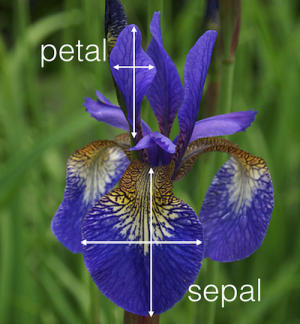

In [1]:
#from IPython.display import Image
#Image(filename='iris.png')

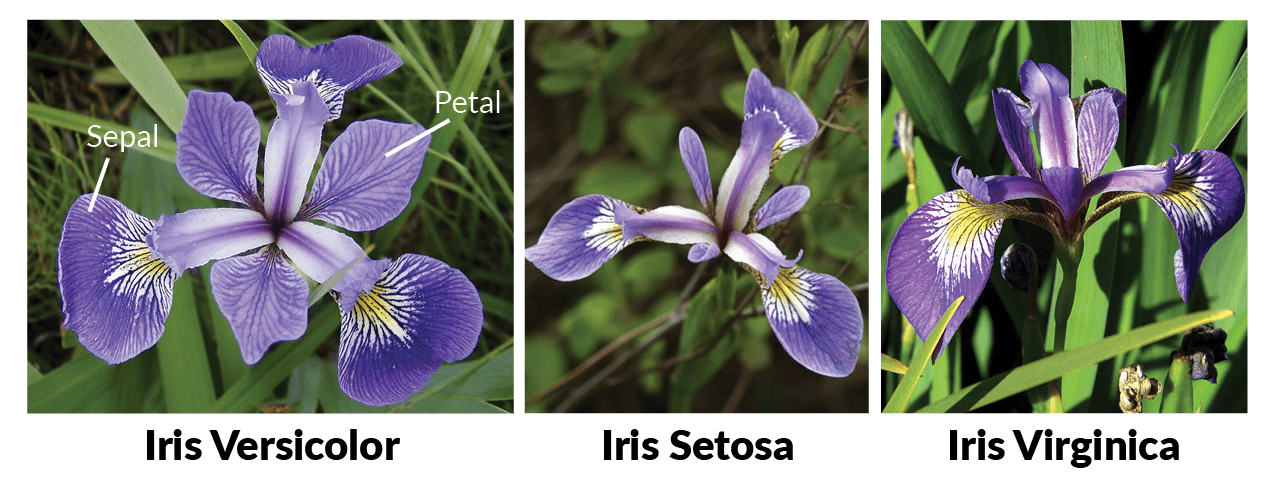

In [2]:
#from IPython.display import Image
#Image(filename='iris-all.png')

## Clustering with K-Means

### Convenience Functions

In [1]:
def plot_decision_boundaries(clf_):
    """
    Loads the Iris Dataset and fits multiple classifier object from Scikit-Learn to the entire data.
    After fitting the learned decision boundaries are plotted.
    """
    # Parameters
    n_classes = 3
    plot_colors = "ryb"
    plot_step = 0.02

    # Load data
    iris = load_iris()

    fig, _axs = plt.subplots(nrows=2, ncols=3)
    fig.set_figheight(15)
    fig.set_figwidth(15)
    axs = _axs.flatten()

    for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                    [1, 2], [1, 3], [2, 3]]):
        # We only take the two corresponding features
        X = iris.data[:, pair]
        y = iris.target

        # Train
        clf_ = clf_.fit(X, y)

        # Plot the decision boundary
        fig.set_figheight(6)
        fig.set_figwidth(10)
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                             np.arange(y_min, y_max, plot_step))
        plt.tight_layout()

        Z = clf_.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        cs = axs[pairidx].contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

        axs[pairidx].set_xlabel(iris.feature_names[pair[0]])
        axs[pairidx].set_ylabel(iris.feature_names[pair[1]])

        # Plot the training points
        for i, color in zip(range(n_classes), plot_colors):
            idx = np.where(y == i)
            axs[pairidx].scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                        cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

    plt.legend(loc='lower right', borderpad=0, handletextpad=0)
    plt.axis("tight")

### Packages

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris

### Fitting 1

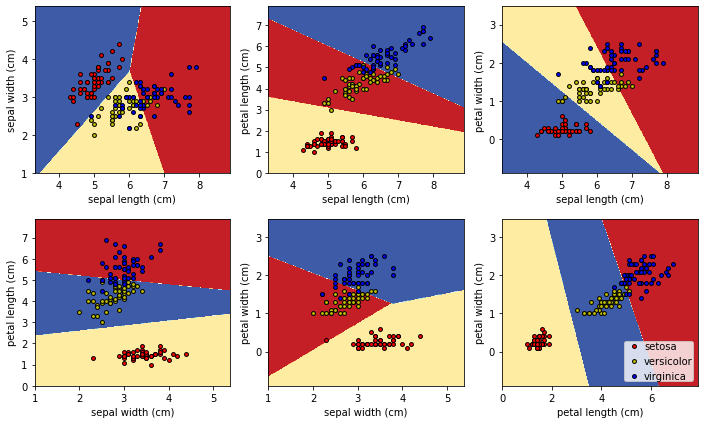

In [3]:
### Play-Zone ###
n_clusters = 3
### Play-Zone ###

clustering = KMeans(n_clusters=n_clusters)
plot_decision_boundaries(clustering)
plt.savefig('K-mean2')

### Fitting 2

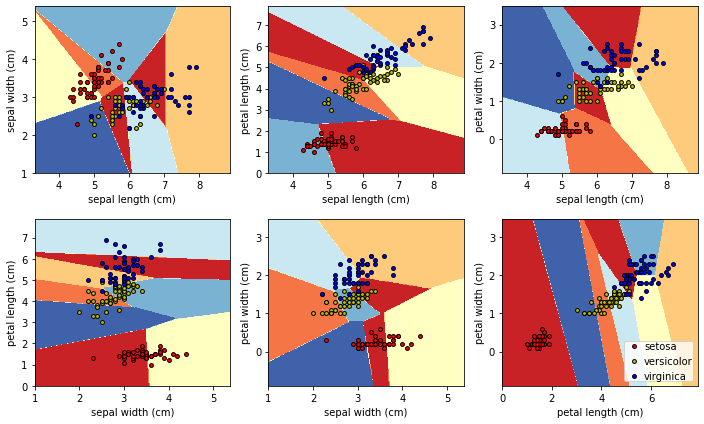

In [4]:
### Play-Zone ###
n_clusters = 8
### Play-Zone ###

clustering = KMeans(n_clusters=n_clusters)
plot_decision_boundaries(clustering)
plt.savefig('K-mean1')